<a href="https://colab.research.google.com/github/mahalaxmi-k/Deep-Learning-Labs/blob/main/DL_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 1: Implementation of a single artificial neuron.

Write a program to simulate a single artificial neuron performing binary classification.

Inputs, weights, bias, and activation function.

In [ ]:
import numpy as np

def sigmoid(x):

    return 1 / (1 + np.exp(-x))

def binary_classification(inputs, weights, bias):

    # Convert inputs and weights to numpy arrays for vectorized operations
    inputs = np.array(inputs)
    weights = np.array(weights)

    # Calculate the weighted sum
    z = np.dot(inputs, weights) + bias

    # Apply the sigmoid activation function
    output = sigmoid(z)

    # Return binary classification (0 or 1) based on a threshold of 0.5
    return 1 if output >= 0.5 else 0

# Example usage
if __name__ == "__main__":
    # Inputs, weights, and bias
    inputs = [1.5, -1.0, 1.0]
    weights = [0.1, -0.5, 0.2]
    bias = 0.1

    # Perform binary classification
    result = binary_classification(inputs, weights, bias)
    print(f"Binary classification result: {result}")


Binary classification result: 1


Experiment 2: Implementation of Single Layer Perceptron (SLP).

Train and test SLP on a linearly separable dataset (e.g., AND/OR gate).

AND Gate:
Predictions: [0 0 0 1]
Trained weights: [5.48 5.48]
Trained bias: -8.31

OR Gate:
Predictions: [0 1 1 1]
Trained weights: [6.18 6.18]
Trained bias: -2.84



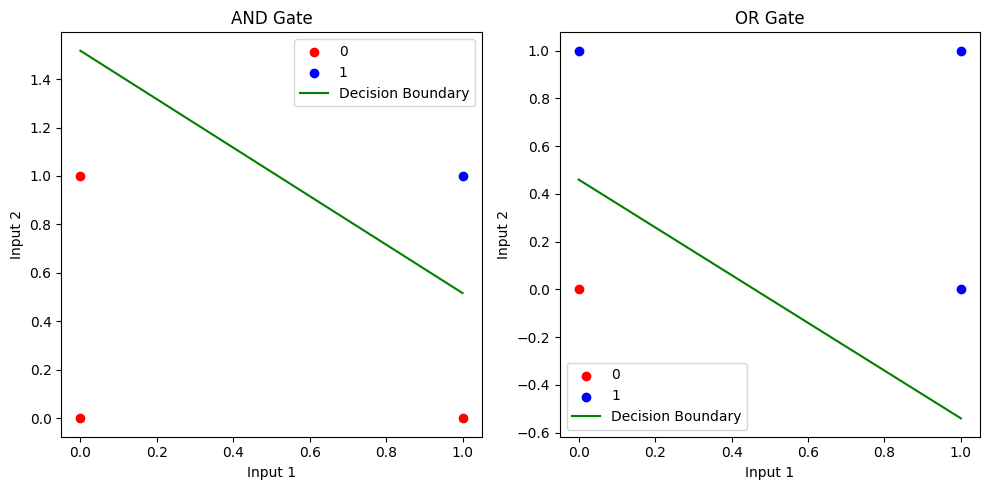

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):

    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    #Derivative of the sigmoid function.

    return x * (1 - x)

def train_slp(X, y, epochs, learning_rate):

    # Initialize weights and bias
    np.random.seed(0)
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()

    for epoch in range(epochs):
        for i in range(len(X)):
            # Forward pass
            z = np.dot(X[i], weights) + bias
            output = sigmoid(z)

            # Compute error
            error = y[i] - output

            # Backpropagation
            weights += learning_rate * error * sigmoid_derivative(output) * X[i]
            bias += learning_rate * error * sigmoid_derivative(output)

    return weights, bias
    #Returns:
    #weights (np.array): Trained weights.
    #bias (float): Trained bias.


#Make predictions using the trained SLP.
def predict(X, weights, bias):
    outputs = sigmoid(np.dot(X, weights) + bias)
    return np.where(outputs >= 0.5, 1, 0)

# Defining GATES
if __name__ == "__main__":
    # Define the AND gate dataset
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])

    # Define the OR gate dataset
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])

    # Training parameters
    epochs = 10000
    learning_rate = 0.1

    # Train the SLP for AND gate
    weights_and, bias_and = train_slp(X_and, y_and, epochs, learning_rate)
    predictions_and = predict(X_and, weights_and, bias_and)

    # Train the SLP for OR gate
    weights_or, bias_or = train_slp(X_or, y_or, epochs, learning_rate)
    predictions_or = predict(X_or, weights_or, bias_or)

    # Print results
    print("AND Gate:")
    print(f"Predictions: {predictions_and}")
    print(f"Trained weights: {np.round(weights_and, 2)}")
    print(f"Trained bias: {np.round(bias_and, 2)}\n")

    print("OR Gate:")
    print(f"Predictions: {predictions_or}")
    print(f"Trained weights: {np.round(weights_or, 2)}")
    print(f"Trained bias: {np.round(bias_or, 2)}\n")


    # Plot results
    plt.figure(figsize=(10, 5))

    # AND Gate
    plt.subplot(1, 2, 1)
    plt.title("AND Gate")
    for i in range(len(X_and)):
        if y_and[i] == 0:
            plt.scatter(X_and[i][0], X_and[i][1], color='red', label='0' if i == 0 else "")
        else:
            plt.scatter(X_and[i][0], X_and[i][1], color='blue', label='1' if i == 3 else "")
    # Plot decision boundary for AND gate
    x1 = np.linspace(0, 1, 100)
    x2 = -(weights_and[0] * x1 + bias_and) / weights_and[1]
    plt.plot(x1, x2, color='green', label='Decision Boundary')
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.legend()

    # OR Gate
    plt.subplot(1, 2, 2)
    plt.title("OR Gate")
    for i in range(len(X_or)):
        if y_or[i] == 0:
            plt.scatter(X_or[i][0], X_or[i][1], color='red', label='0' if i == 0 else "")
        else:
            plt.scatter(X_or[i][0], X_or[i][1], color='blue', label='1' if i == 1 else "")
    # Plot decision boundary for OR gate
    x1 = np.linspace(0, 1, 100)
    x2 = -(weights_or[0] * x1 + bias_or) / weights_or[1]
    plt.plot(x1, x2, color='green', label='Decision Boundary')
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.legend()

    plt.tight_layout()
    plt.show()


Experiment 3: Multi-Layer Perceptron (MLP) for XOR Gate.

Design and train MLP to solve the XOR problem.

XOR Gate:
Predictions: [1 0 0 1]
Trained Hidden Weights: [[5.83 5.8 ]
 [3.72 3.71]]
Trained Hidden Bias: [-2.43 -5.69]
Trained Output Weights: [-7.51  8.17]
Trained Output Bias: 3.38


<ipython-input-7-6d7e6e64940e>:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


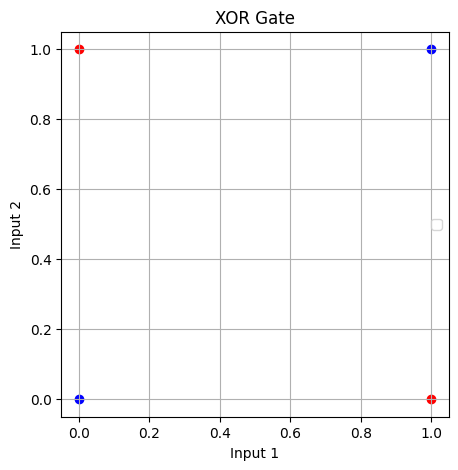

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):

    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):

    return x * (1 - x)

def train_mlp(X, y, epochs, learning_rate):

    # Initialize weights and biases
    np.random.seed(0)
    hidden_weights = np.random.rand(2, 2)
    hidden_bias = np.random.rand(2)
    output_weights = np.random.rand(2)
    output_bias = np.random.rand()

    for epoch in range(epochs):
        for i in range(len(X)):
            # Forward pass
            hidden_input = np.dot(X[i], hidden_weights.T) + hidden_bias
            hidden_output = sigmoid(hidden_input)

            final_input = np.dot(hidden_output, output_weights) + output_bias
            final_output = sigmoid(final_input)

            # Compute error
            error = y[i] - final_output

            # Backpropagation
            output_gradient = error * sigmoid_derivative(final_output)
            hidden_gradient = output_gradient * output_weights * sigmoid_derivative(hidden_output)

            # Update weights and biases
            output_weights += learning_rate * output_gradient * hidden_output
            output_bias += learning_rate * output_gradient

            hidden_weights += learning_rate * np.outer(hidden_gradient, X[i])
            hidden_bias += learning_rate * hidden_gradient

    return {
        "hidden_weights": hidden_weights,
        "hidden_bias": hidden_bias,
        "output_weights": output_weights,
        "output_bias": output_bias
    }
    #Returns: dict: Trained weights and biases for hidden and output layers.


#Make predictions using the trained MLP.
def predict_mlp(X, model):

    hidden_input = np.dot(X, model["hidden_weights"].T) + model["hidden_bias"]
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, model["output_weights"]) + model["output_bias"]
    final_output = sigmoid(final_input)

    return np.where(final_output >= 0.5, 1, 0)

# Example usage
if __name__ == "__main__":
    # Define the XOR gate dataset
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([1, 0, 0, 1])

    # Training parameters
    epochs = 10000
    learning_rate = 0.1

    # Train the MLP for XOR gate
    model = train_mlp(X_xor, y_xor, epochs, learning_rate)
    predictions = predict_mlp(X_xor, model)

    # Print results
    print("XOR Gate:")
    print(f"Predictions: {predictions}")
    print(f"Trained Hidden Weights: {np.round(model['hidden_weights'], 2)}")
    print(f"Trained Hidden Bias: {np.round(model['hidden_bias'], 2)}")
    print(f"Trained Output Weights: {np.round(model['output_weights'], 2)}")
    print(f"Trained Output Bias: {np.round(model['output_bias'], 2)}")

    # Plot results
    plt.figure(figsize=(5, 5))
    plt.title("XOR Gate")
    for i in range(len(X_xor)):
        if y_xor[i] == 0:
            plt.scatter(X_xor[i][0], X_xor[i][1], color='red', label='0' if i == 0 else "")
        else:
            plt.scatter(X_xor[i][0], X_xor[i][1], color='blue', label='1' if i == 1 else "")

    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.legend()
    plt.grid()
    plt.show()


Experiment 4: Activation Functions.

Implement Sigmoid, ReLU, and Tanh activation functions.

Compare their outputs on a dataset.

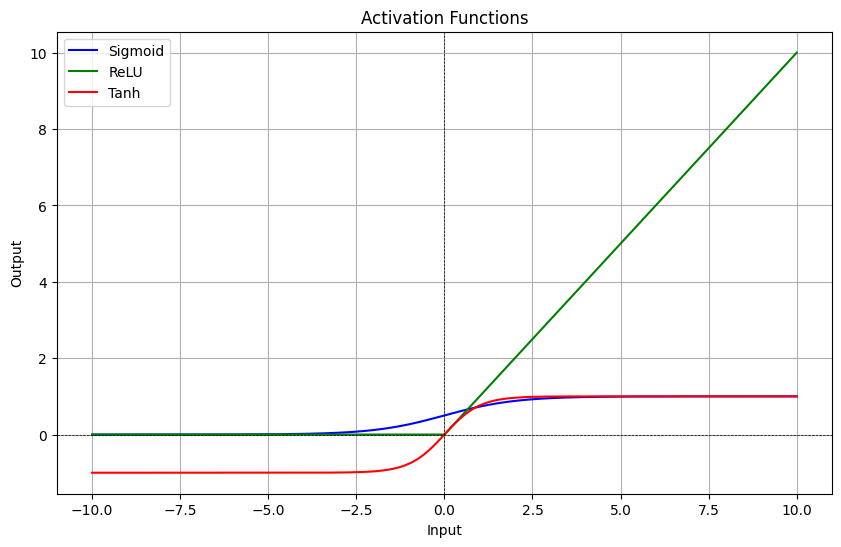

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):

    return 1 / (1 + np.exp(-x))

def relu(x):

    return np.maximum(0, x)

def tanh(x):

    return np.tanh(x)

def plot_activation_functions(x):

    y_sigmoid = sigmoid(x)
    y_relu = relu(x)
    y_tanh = tanh(x)

    plt.figure(figsize=(10, 6))

    # Sigmoid plot
    plt.plot(x, y_sigmoid, label="Sigmoid", color="blue")

    # ReLU plot
    plt.plot(x, y_relu, label="ReLU", color="green")

    # Tanh plot
    plt.plot(x, y_tanh, label="Tanh", color="red")

    plt.title("Activation Functions")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Generate input data
    x = np.linspace(-10, 10, 500)

    # Plot the activation functions
    plot_activation_functions(x)


Experiment 5: Forward and Backpropagation.

Implement forward propagation and backpropagation manually for a 2-layer neural network.

In [ ]:
import numpy as np

def sigmoid(x):

    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):

    return x * (1 - x)

def forward_propagation(X, weights_hidden, bias_hidden, weights_output, bias_output):

    # Hidden layer
    hidden_input = np.dot(X, weights_hidden.T) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    # Output layer
    final_input = np.dot(hidden_output, weights_output) + bias_output
    final_output = sigmoid(final_input)

    return {
        "hidden_output": hidden_output,
        "final_output": final_output
    }
    #Returns: dict: Outputs from hidden and final layers.


def back_propagation(X, y, forward_outputs, weights_hidden, weights_output, learning_rate):

    hidden_output = forward_outputs["hidden_output"]
    final_output = forward_outputs["final_output"]

    # Error at output layer
    error_output = y - final_output
    delta_output = error_output * sigmoid_derivative(final_output)

    # Error at hidden layer
    # Use the transpose of weights_output for correct backpropagation
    error_hidden = np.dot(delta_output, weights_output.T)
    delta_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_output += learning_rate * np.dot(hidden_output.T, delta_output)
    bias_output = np.sum(delta_output, axis=0) * learning_rate

    weights_hidden += learning_rate * np.dot(delta_hidden.T, X)
    bias_hidden = np.sum(delta_hidden, axis=0) * learning_rate

    return weights_hidden, bias_hidden, weights_output, bias_output
    #Returns: tuple: Updated weights and biases for hidden and output layers.


# Example usage
if __name__ == "__main__":
    # XOR dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Initialize parameters
    np.random.seed(0)
    weights_hidden = np.random.rand(2, 2)
    bias_hidden = np.random.rand(2)
    weights_output = np.random.rand(2, 1)
    bias_output = np.random.rand(1)

    # Training parameters
    epochs = 10000
    learning_rate = 0.1

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        forward_outputs = forward_propagation(X, weights_hidden, bias_hidden, weights_output, bias_output)

        # Backpropagation
        weights_hidden, bias_hidden, weights_output, bias_output = back_propagation(
            X, y, forward_outputs, weights_hidden, weights_output, learning_rate
        )

    # Predictions
    final_outputs = forward_propagation(X, weights_hidden, bias_hidden, weights_output, bias_output)
    predictions = (final_outputs["final_output"] > 0.5).astype(int)

    print("Predictions:", predictions.flatten())
    print("Trained Hidden Weights:", np.round(weights_hidden, 2))
    print("Trained Hidden Bias:", np.round(bias_hidden, 2))
    print("Trained Output Weights:", np.round(weights_output, 2))
    print("Trained Output Bias:", np.round(bias_output, 2))


Predictions: [0 1 1 0]
Trained Hidden Weights: [[0.78 0.78]
 [5.54 5.55]]
Trained Hidden Bias: [-0.   -0.01]
Trained Output Weights: [[-11.74]
 [  9.09]]
Trained Output Bias: [-0.]
